In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import  Dense, Flatten
from tensorflow.keras.models import Model
from scipy.ndimage import rotate
from sklearn.utils import shuffle

# prepare data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

unlabeld_index = np.ones(y_train.shape, np.bool)

N = 20
for i in range(10):
  idx = np.where(y_train == i)[0][:N]
  unlabeld_index[idx] = 0

x_unlabeld = x_train[np.where(unlabeld_index)[0], ...]

x_train = x_train[np.where(~unlabeld_index)[0], ...]
y_train = y_train[np.where(~unlabeld_index)[0], ...]

In [4]:
# examples of categorical crossentropy
cce = keras.losses.CategoricalCrossentropy()

# a labeled data from the second class
y_true = [[0, 1, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# an ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# another ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.1, 0.4, 0.3, 0.2]]
print(cce(y_true, y_pred).numpy())

0.051293306
-0.0
-0.0


In [5]:
x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test.astype('float32')
x_test = x_test/255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
X = tf.keras.models.Sequential()

X.add(tf.keras.applications.ResNet50(include_top=False, input_shape=(32, 32, 3), weights=None))
X.add(Flatten(name="flatten"))
X.add(Dense(10, activation="softmax"))

X.summary()

X.compile(optimizer=tf.keras.optimizers.Adam(),
               loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [7]:
X.fit(x_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
7/7 [==============================] - 7s 549ms/step - loss: 5.5109 - accuracy: 0.0800
Epoch 2/30
7/7 [==============================] - 4s 546ms/step - loss: 4.5375 - accuracy: 0.1550
Epoch 3/30
7/7 [==============================] - 4s 544ms/step - loss: 3.0213 - accuracy: 0.2350
Epoch 4/30
7/7 [==============================] - 4s 548ms/step - loss: 2.1538 - accuracy: 0.3000
Epoch 5/30
7/7 [==============================] - 4s 543ms/step - loss: 2.2300 - accuracy: 0.4250
Epoch 6/30
7/7 [==============================] - 4s 548ms/step - loss: 1.7327 - accuracy: 0.5150
Epoch 7/30
7/7 [==============================] - 4s 548ms/step - loss: 1.1938 - accuracy: 0.7100
Epoch 8/30
7/7 [==============================] - 4s 551ms/step - loss: 0.8431 - accuracy: 0.7850
Epoch 9/30
7/7 [==============================] - 4s 550ms/step - loss: 0.6555 - accuracy: 0.8300
Epoch 10/30
7/7 [==============================] - 4s 545ms/step - loss: 0.5738 - accuracy: 0.9150
Epoch 11/30
7/7 [==

In [8]:
X.evaluate(x_test,y_test)

313/313 [==============================] - 7s 19ms/step - loss: 3.4984 - accuracy: 0.0999


[3.498427391052246, 0.09989999979734421]

In [9]:
x_train_new= []
y_train_new = []

x_unlabeld = x_unlabeld.astype('float32')
x_unlabeld = x_unlabeld/255

degrees = [0,90,180,270]

for images in x_unlabeld:
  for degree in degrees:
    x_train_new.append(rotate(images, angle=degree))
    y = np.zeros(4)
    y[degrees.index(degree)] = 1
    y_train_new.append(y)

x_rotated = np.array(x_train_new)
y_rotated = np.array(y_train_new)

In [10]:
X_rotate = tf.keras.models.Sequential()

X_rotate.add(tf.keras.applications.MobileNet(include_top=False, input_shape=(32, 32, 3), weights=None))
X_rotate.add(Flatten(name="flatten"))
X_rotate.add(Dense(4, activation="softmax"))

X_rotate.summary()

X_rotate.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_32 (Functiona (None, 1, 1, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4100      
Total params: 3,232,964
Trainable params: 3,211,076
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
X_rotate.fit(x_rotated, y_rotated, batch_size=128, epochs=10)

Epoch 1/10
1557/1557 [==============================] - 401s 257ms/step - loss: 0.7739 - accuracy: 0.6869
Epoch 2/10
1557/1557 [==============================] - 402s 258ms/step - loss: 0.7206 - accuracy: 0.7129
Epoch 3/10
1557/1557 [==============================] - 402s 258ms/step - loss: 0.6637 - accuracy: 0.7366
Epoch 4/10
1557/1557 [==============================] - 401s 257ms/step - loss: 0.6162 - accuracy: 0.7578
Epoch 5/10
1557/1557 [==============================] - 401s 258ms/step - loss: 0.5680 - accuracy: 0.7787
Epoch 6/10
1557/1557 [==============================] - 402s 258ms/step - loss: 0.5283 - accuracy: 0.7947
Epoch 7/10
1557/1557 [==============================] - 402s 258ms/step - loss: 0.4937 - accuracy: 0.8096
Epoch 8/10
1557/1557 [==============================] - 402s 258ms/step - loss: 0.4599 - accuracy: 0.8218
Epoch 9/10
1557/1557 [==============================] - 402s 258ms/step - loss: 0.4248 - accuracy: 0.8373
Epoch 10/10
1557/1557 [=======================

In [ ]:
X_new = keras.Model(X.inputs, Dense(10 ,activation='softmax')(X.layers[-2].output))
X_new.summary()

In [36]:
X_new.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
X_new.fit(x_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
7/7 [==============================] - 7s 545ms/step - loss: 3.0474 - accuracy: 0.2750
Epoch 2/30
7/7 [==============================] - 4s 545ms/step - loss: 2.3747 - accuracy: 0.3400
Epoch 3/30
7/7 [==============================] - 4s 548ms/step - loss: 1.3775 - accuracy: 0.6150
Epoch 4/30
7/7 [==============================] - 4s 546ms/step - loss: 1.4457 - accuracy: 0.6750
Epoch 5/30
7/7 [==============================] - 4s 545ms/step - loss: 1.0635 - accuracy: 0.6750
Epoch 6/30
7/7 [==============================] - 4s 547ms/step - loss: 0.7695 - accuracy: 0.8100
Epoch 7/30
7/7 [==============================] - 4s 549ms/step - loss: 1.1478 - accuracy: 0.6900
Epoch 8/30
7/7 [==============================] - 4s 547ms/step - loss: 1.1912 - accuracy: 0.6750
Epoch 9/30
7/7 [==============================] - 4s 545ms/step - loss: 1.0723 - accuracy: 0.6900
Epoch 10/30
7/7 [==============================] - 4s 547ms/step - loss: 0.7754 - accuracy: 0.8250
Epoch 11/30
7/7 [==

In [6]:
x_train_new= []
y_train_new = []
y_classification = []


x_unlabeld = x_unlabeld.astype('float32')
x_unlabeld = x_unlabeld/255

degrees = [0,90,180,270]

In [7]:
for images in x_unlabeld:
    for degree in degrees:
        x_train_new.append(rotate(images, angle=degree))
        y = np.zeros(4)
        y[degrees.index(degree)] = 1
        y_train_new.append(y)
        y_classification.append(np.zeros(10))

In [8]:
for images in x_train:
    for degree in degrees:
      x_train_new.append(rotate(images, angle=degree))
      y = np.zeros(4)
      y[degrees.index(degree)] = 1
      y_train_new.append(y)

In [9]:
for Y in range(len(x_train)):
    for x in range(4):
        y_classification.append(y_train[Y])

In [10]:
x_rotated = np.array(x_train_new)
y_rotated = np.array(y_train_new)
y_classification = np.array(y_classification)

In [11]:
print(x_rotated.shape)
print(y_classification.shape)
print(y_rotated.shape)

(200000, 32, 32, 3)
(200000, 10)
(200000, 4)


In [12]:
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, Input, Activation

In [13]:
def train_simple(classification,rotation):
    INp = Input(shape=(x_train.shape[1:]),)
    Conv2D_ = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(INp)
    pool = MaxPooling2D(pool_size=(3, 3))(Conv2D_)
    Do = Dropout(rate=0.2)(pool)
    Conv2D_ = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(Do)
    pool = MaxPooling2D(pool_size=(2, 2))(Conv2D_)
    Do = Dropout(rate=0.2)(pool)
    Conv2D_ = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(Do)
    flt = Flatten()(Conv2D_)
    dense = Dense(units=1024, activation='relu')(flt)
    Hold = keras.Model(inputs=INp, outputs=dense)

    
    classifier = Dense(units=10, activation='softmax', name='classifier')(Hold.outputs[0])
    rotator = Dense(units=4, activation='softmax', name='rotator')(Hold.outputs[0])

    model_double = keras.Model(inputs=Hold.inputs, outputs=[classifier, rotator])
    
    model_double.compile(optimizer='adam', metrics=['accuracy'], loss_weights={'classifier': 10,'rotator': 1}, loss='categorical_crossentropy')

    history = model_double.fit(
        x_rotated,
        [y_classification,y_rotated],
        batch_size=128,
        epochs=10,
        validation_split = 0.2
    )
    
    
    return history

In [18]:
def train(classification,rotation):
    MobileNet_model = tf.keras.applications.MobileNet(include_top=False, input_shape=(32, 32, 3), weights=None)
    flat = Flatten()(MobileNet_model.layers[-1].output)
    denseA = Dense(128, activation='relu')(flat)
    dense4 = Dense(4, activation='softmax', name='rotation')(denseA)
    dense10 = Dense(10, activation='softmax', name='classification')(denseA)
    
    model_double = Model(inputs=MobileNet_model.inputs, outputs=[dense10, dense4])

    model_double.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001) ,loss_weights={'classification': classification,'rotation': rotation},
                        loss={'classification': 'categorical_crossentropy', 'rotation': 'categorical_crossentropy'},
                        metrics={'classification': 'accuracy','rotation': 'accuracy'})

    history = model_double.fit(
        x_rotated,
        [y_classification,y_rotated],
        batch_size=128,
        epochs=10,
        validation_split = 0.2)
    
    return history

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


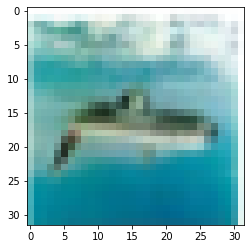

In [19]:
A = len(x_rotated) - 1
plt.imshow(x_rotated[A-1])
print(y_classification[A-1])

In [20]:
train(5,1)

Epoch 1/10
1250/1250 [==============================] - 321s 255ms/step - loss: 53.4203 - classification_loss: 0.0000e+00 - rotation_loss: 53.4203 - classification_accuracy: 0.0897 - rotation_accuracy: 0.2480 - val_loss: 160.9313 - val_classification_loss: 7.1942 - val_rotation_loss: 124.9602 - val_classification_accuracy: 0.0022 - val_rotation_accuracy: 0.2529
Epoch 2/10
1250/1250 [==============================] - 324s 259ms/step - loss: 338.5016 - classification_loss: 0.0000e+00 - rotation_loss: 338.5016 - classification_accuracy: 0.1022 - rotation_accuracy: 0.2495 - val_loss: 489.5877 - val_classification_loss: 15.8368 - val_rotation_loss: 410.4037 - val_classification_accuracy: 0.0019 - val_rotation_accuracy: 0.2542
Epoch 3/10
1250/1250 [==============================] - 323s 258ms/step - loss: 549.2380 - classification_loss: 0.0000e+00 - rotation_loss: 549.2380 - classification_accuracy: 0.1010 - rotation_accuracy: 0.2502 - val_loss: 694.3292 - val_classification_loss: 24.7359 - 

In [21]:
train(1,1)

Epoch 1/10
1250/1250 [==============================] - 326s 260ms/step - loss: 69.5134 - classification_loss: 0.0000e+00 - rotation_loss: 69.5134 - classification_accuracy: 0.1124 - rotation_accuracy: 0.2544 - val_loss: 21.6016 - val_classification_loss: 0.4993 - val_rotation_loss: 21.1022 - val_classification_accuracy: 0.0020 - val_rotation_accuracy: 0.2500
Epoch 2/10
1250/1250 [==============================] - 324s 259ms/step - loss: 382.2999 - classification_loss: 0.0000e+00 - rotation_loss: 382.2999 - classification_accuracy: 0.0849 - rotation_accuracy: 0.2502 - val_loss: 235.6201 - val_classification_loss: 14.1501 - val_rotation_loss: 221.4700 - val_classification_accuracy: 0.0018 - val_rotation_accuracy: 0.2500
Epoch 3/10
1250/1250 [==============================] - 324s 259ms/step - loss: 622.4053 - classification_loss: 0.0000e+00 - rotation_loss: 622.4053 - classification_accuracy: 0.0957 - rotation_accuracy: 0.2523 - val_loss: 898.0247 - val_classification_loss: 29.0135 - va

In [22]:
train(1,5)

Epoch 1/10
1250/1250 [==============================] - 326s 260ms/step - loss: 273.4536 - classification_loss: 0.0000e+00 - rotation_loss: 54.6907 - classification_accuracy: 0.1046 - rotation_accuracy: 0.2513 - val_loss: 369.4855 - val_classification_loss: 5.8851 - val_rotation_loss: 72.7201 - val_classification_accuracy: 0.0018 - val_rotation_accuracy: 0.2500
Epoch 2/10
1250/1250 [==============================] - 324s 259ms/step - loss: 1519.4174 - classification_loss: 0.0000e+00 - rotation_loss: 303.8833 - classification_accuracy: 0.0848 - rotation_accuracy: 0.2511 - val_loss: 1480.3754 - val_classification_loss: 17.2988 - val_rotation_loss: 292.6153 - val_classification_accuracy: 0.0019 - val_rotation_accuracy: 0.2500
Epoch 3/10
1250/1250 [==============================] - 324s 259ms/step - loss: 3013.0286 - classification_loss: 0.0000e+00 - rotation_loss: 602.6059 - classification_accuracy: 0.0956 - rotation_accuracy: 0.2486 - val_loss: 4611.8091 - val_classification_loss: 12.138

In [23]:
train(1,50)

Epoch 1/10
1250/1250 [==============================] - 328s 261ms/step - loss: 559.5211 - classification_loss: 0.0000e+00 - rotation_loss: 11.1904 - classification_accuracy: 0.1256 - rotation_accuracy: 0.2642 - val_loss: 1985.2168 - val_classification_loss: 2.0378 - val_rotation_loss: 39.6636 - val_classification_accuracy: 0.1756 - val_rotation_accuracy: 0.2500
Epoch 2/10
1250/1250 [==============================] - 325s 260ms/step - loss: 3126.1462 - classification_loss: 0.0000e+00 - rotation_loss: 62.5229 - classification_accuracy: 0.2637 - rotation_accuracy: 0.2502 - val_loss: 214.1960 - val_classification_loss: 0.1171 - val_rotation_loss: 4.2816 - val_classification_accuracy: 0.9820 - val_rotation_accuracy: 0.2500
Epoch 3/10
1250/1250 [==============================] - 325s 260ms/step - loss: 6121.7427 - classification_loss: 0.0000e+00 - rotation_loss: 122.4346 - classification_accuracy: 0.1618 - rotation_accuracy: 0.2498 - val_loss: 247.7967 - val_classification_loss: 0.3221 - va

In [24]:
train(50,1)

Epoch 1/10
1250/1250 [==============================] - 329s 262ms/step - loss: 75.4261 - classification_loss: 0.0000e+00 - rotation_loss: 75.4261 - classification_accuracy: 0.0823 - rotation_accuracy: 0.2498 - val_loss: 572.3885 - val_classification_loss: 4.9099 - val_rotation_loss: 326.8930 - val_classification_accuracy: 0.0021 - val_rotation_accuracy: 0.2500
Epoch 2/10
1250/1250 [==============================] - 327s 262ms/step - loss: 369.8727 - classification_loss: 0.0000e+00 - rotation_loss: 369.8727 - classification_accuracy: 0.0987 - rotation_accuracy: 0.2506 - val_loss: 1607.2616 - val_classification_loss: 27.2379 - val_rotation_loss: 245.3686 - val_classification_accuracy: 0.0020 - val_rotation_accuracy: 0.2500
Epoch 3/10
1250/1250 [==============================] - 327s 262ms/step - loss: 702.9659 - classification_loss: 0.0000e+00 - rotation_loss: 702.9659 - classification_accuracy: 0.1007 - rotation_accuracy: 0.2514 - val_loss: 2515.6101 - val_classification_loss: 24.8766 

In [25]:
train(200,1)

Epoch 1/10
1250/1250 [==============================] - 330s 263ms/step - loss: 78.4313 - classification_loss: 0.0000e+00 - rotation_loss: 78.4313 - classification_accuracy: 0.0632 - rotation_accuracy: 0.2489 - val_loss: 2523.4539 - val_classification_loss: 11.4200 - val_rotation_loss: 239.4454 - val_classification_accuracy: 0.0020 - val_rotation_accuracy: 0.2371
Epoch 2/10
1250/1250 [==============================] - 328s 262ms/step - loss: 454.7282 - classification_loss: 0.0000e+00 - rotation_loss: 454.7282 - classification_accuracy: 0.0846 - rotation_accuracy: 0.2509 - val_loss: 2545.3003 - val_classification_loss: 11.5995 - val_rotation_loss: 225.4080 - val_classification_accuracy: 0.0019 - val_rotation_accuracy: 0.2504
Epoch 3/10
1250/1250 [==============================] - 327s 262ms/step - loss: 655.6214 - classification_loss: 0.0000e+00 - rotation_loss: 655.6214 - classification_accuracy: 0.0925 - rotation_accuracy: 0.2504 - val_loss: 6617.5610 - val_classification_loss: 31.391

In [26]:
train(1,200)

Epoch 1/10
1250/1250 [==============================] - 331s 264ms/step - loss: 789.4280 - classification_loss: 0.0000e+00 - rotation_loss: 3.9471 - classification_accuracy: 0.1630 - rotation_accuracy: 0.3063 - val_loss: 1605.7920 - val_classification_loss: 0.4453 - val_rotation_loss: 8.0267 - val_classification_accuracy: 0.0020 - val_rotation_accuracy: 0.2500
Epoch 2/10
1250/1250 [==============================] - 329s 263ms/step - loss: 6586.7280 - classification_loss: 0.0000e+00 - rotation_loss: 32.9336 - classification_accuracy: 0.1101 - rotation_accuracy: 0.2506 - val_loss: 8718.8096 - val_classification_loss: 2.0347 - val_rotation_loss: 43.5838 - val_classification_accuracy: 0.0020 - val_rotation_accuracy: 0.2653
Epoch 3/10
1250/1250 [==============================] - 329s 263ms/step - loss: 12279.4971 - classification_loss: 0.0000e+00 - rotation_loss: 61.3975 - classification_accuracy: 0.1015 - rotation_accuracy: 0.2500 - val_loss: 32186.0312 - val_classification_loss: 3.0817 - 